# **Movie Recommendation Systems**

Dataset:
[TMDB 5000 Movie Dataset](https://www.kaggle.com/tmdb/tmdb-movie-metadata)

In [41]:
import pandas as pd 
import numpy as np 
df1=pd.read_csv('movies_dataset/tmdb_5000_credits.csv')
df2=pd.read_csv('movies_dataset/tmdb_5000_movies.csv')

In [42]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')  # merging based on id as the id is smae in most of the datasets

In [43]:
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [44]:
C= df2['vote_average'].mean()
C   # being used to calculate the weighteed rating 
# it would effect it directly

6.092171559442016

In [45]:
m= df2['vote_count'].quantile(0.9)
m
# this is used in the format of
# vote_count/vote_count+m

1838.4000000000015

In [46]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape
# reshaping this helps in reducing the size

(481, 23)

In [47]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    #based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [48]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [49]:
q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['title', 'vote_count', 'vote_average', 'score']]

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
...,...,...,...,...
41,Green Lantern,2487,5.1,5.521697
337,A Good Day to Die Hard,3493,5.2,5.507643
193,After Earth,2532,5.0,5.459420
91,Independence Day: Resurgence,2491,4.9,5.406234


Text(0.5, 1.0, 'Popular Movies')

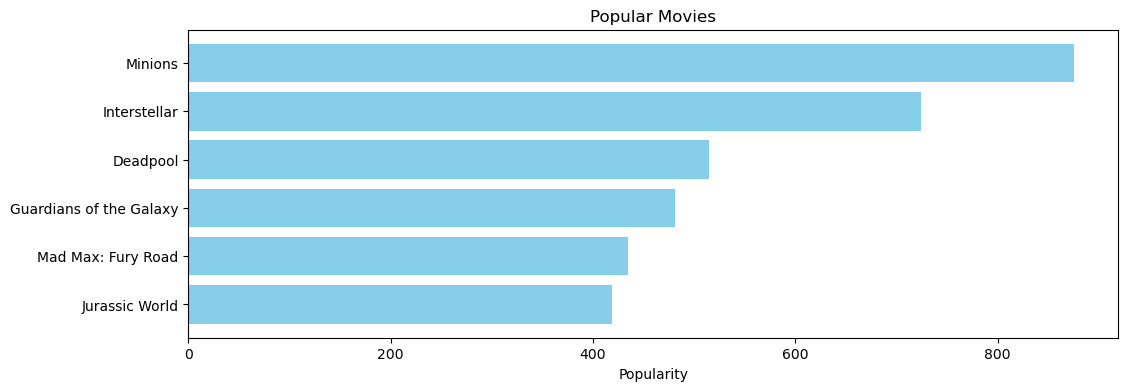

In [50]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")


In [51]:
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

In [52]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english')


df2['overview'] = df2['overview'].fillna('')

tfidf_matrix = tfidf.fit_transform(df2['overview'])

tfidf_matrix.shape

(4803, 20978)

In [53]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()


In [55]:
# Function that takes in movie title as input and outputs most similar movies
#def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
#   idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
#   sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
#    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
#    sim_scores = sim_scores[1:11]

    # Get the movie indices
#    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
#    return df2['title'].iloc[movie_indices]

In [56]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [57]:
#used to the represent the results in a graph format.
import networkx as nx
import matplotlib.pyplot as plt

def get_recommendations(title, cosine_sim=cosine_sim):

    idx = indices[title]
    

    sim_scores = list(enumerate(cosine_sim[idx]))
    

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    
    sim_scores = sim_scores[1:11]
    

    movie_indices = [i[0] for i in sim_scores]
    

    G = nx.Graph()

    G.add_node(title)
    

    recommended_movies = df2['title'].iloc[movie_indices]
    G.add_nodes_from(recommended_movies)

    for movie in recommended_movies:
        G.add_edge(title, movie)
    

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray', font_size=10)
    plt.axis('off')
    plt.show()
    

    return recommended_movies

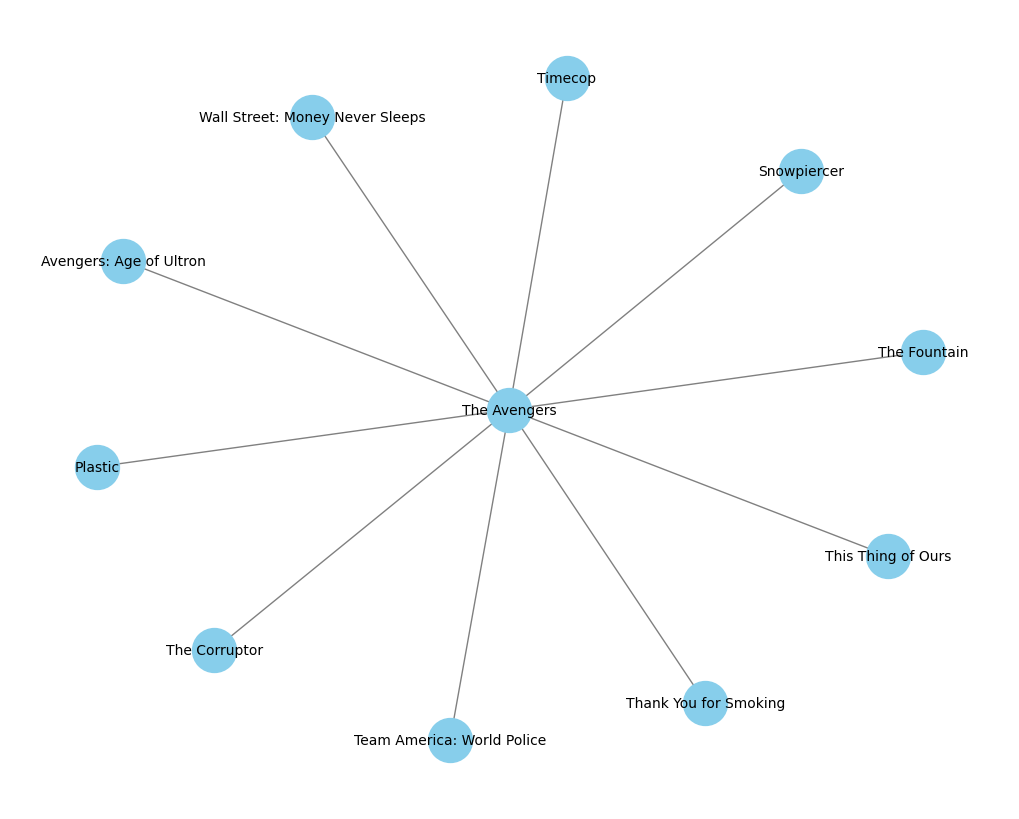

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [58]:
get_recommendations('The Avengers')

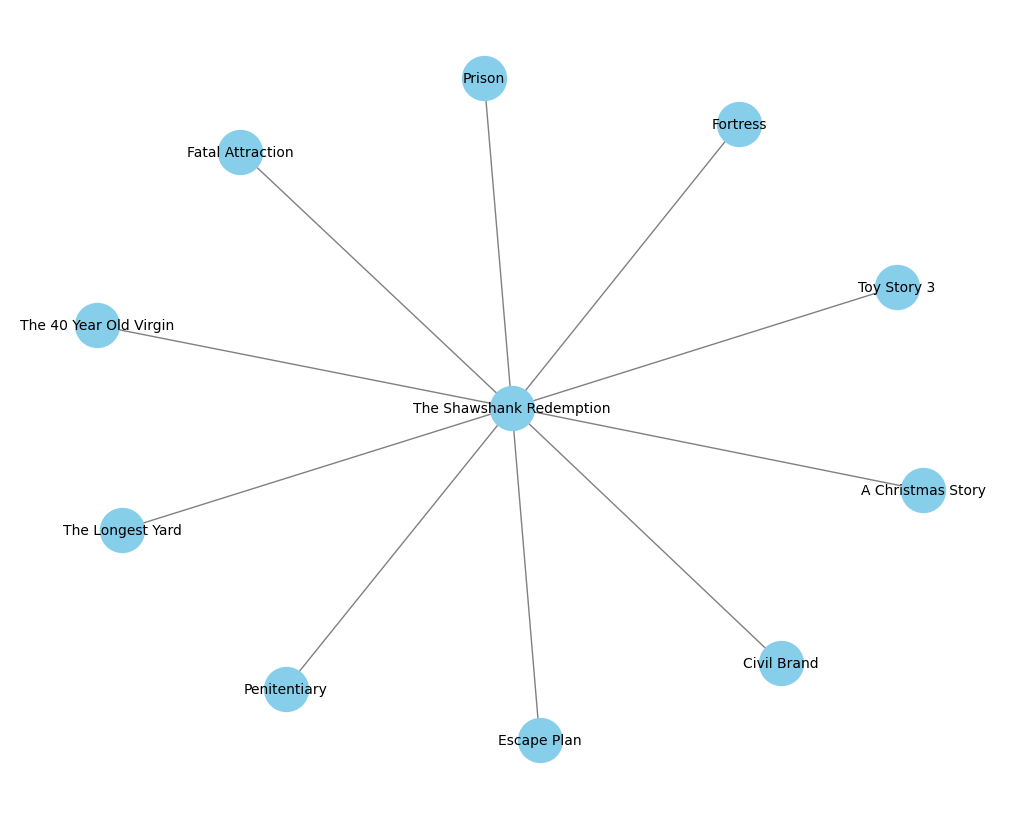

4531               Civil Brand
3785                    Prison
609                Escape Plan
2868                  Fortress
4727              Penitentiary
1779    The 40 Year Old Virgin
2667          Fatal Attraction
3871         A Christmas Story
434           The Longest Yard
42                 Toy Story 3
Name: title, dtype: object

In [59]:
get_recommendations('The Shawshank Redemption')

In [60]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [61]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [62]:

def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        
        if len(names) > 3:
            names = names[:3]
        return names


    return []

In [63]:

df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [64]:

df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [65]:

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [66]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [67]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [68]:
# Import CountVectorizer and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [69]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [70]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

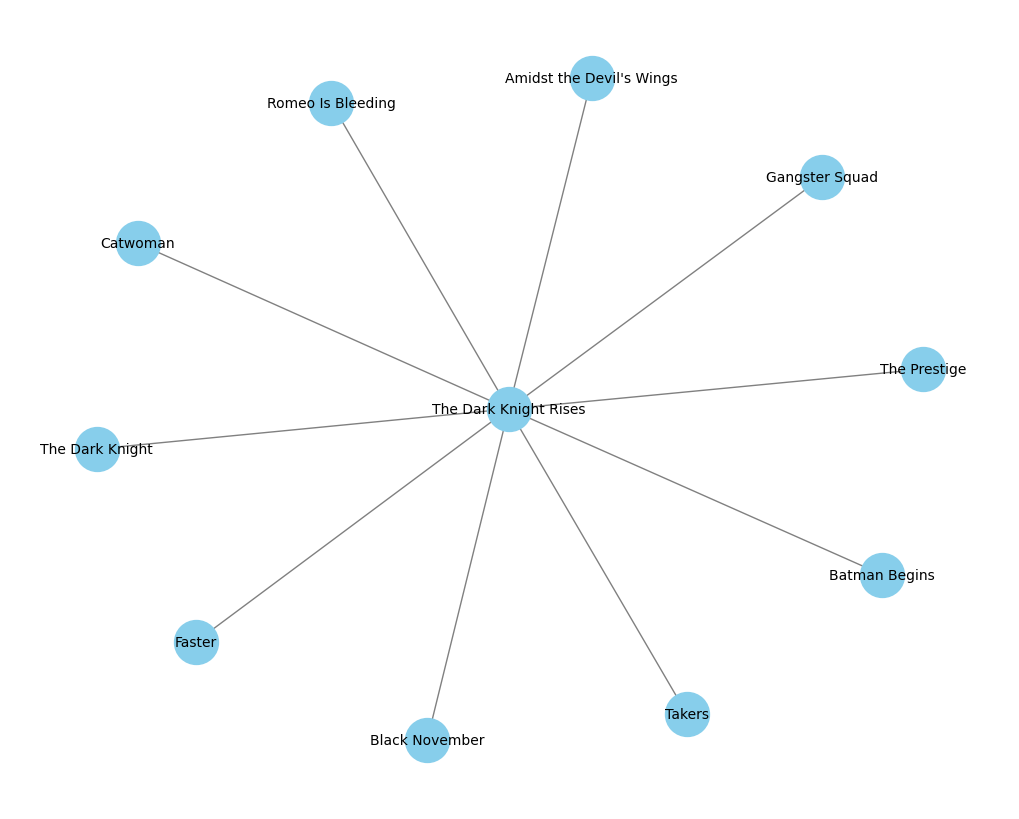

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [71]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

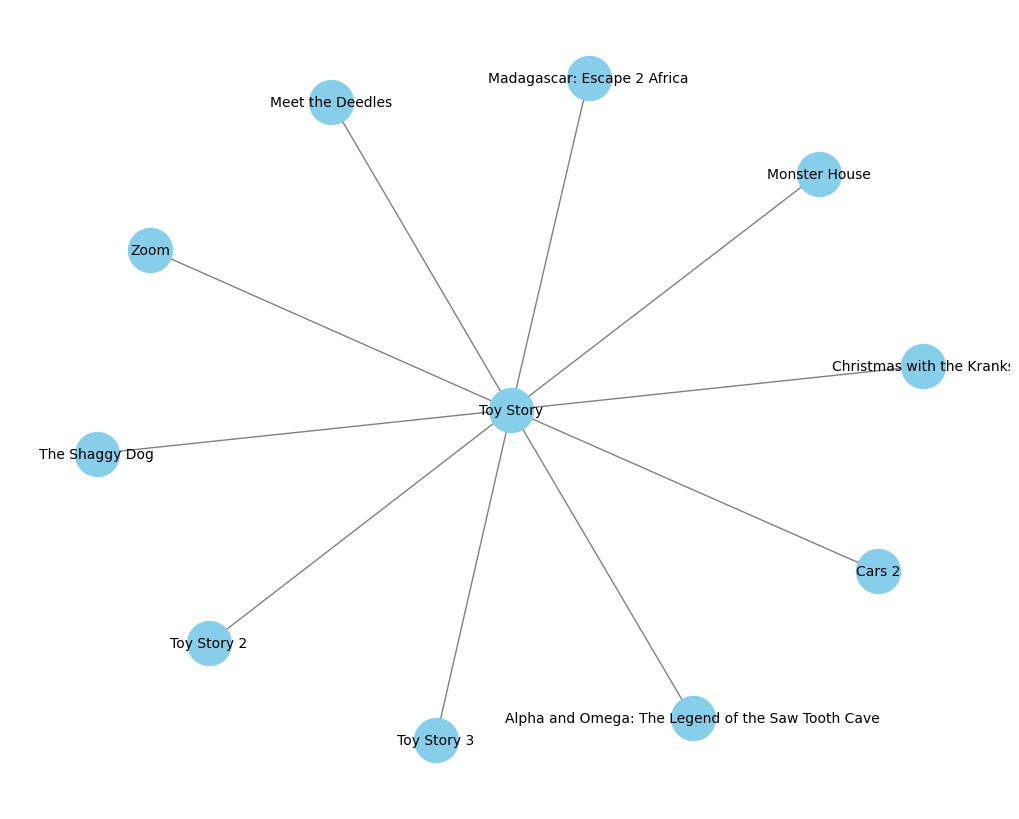

42                                            Toy Story 3
343                                           Toy Story 2
40                                                 Cars 2
533                                         Monster House
1983                                     Meet the Deedles
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
927                             Christmas with the Kranks
120                           Madagascar: Escape 2 Africa
725                                        The Shaggy Dog
1451                                                 Zoom
Name: title, dtype: object

In [72]:
get_recommendations('Toy Story', cosine_sim2)

In [73]:
pip install pandas numpy scikit-learn surprise


Note: you may need to restart the kernel to use updated packages.


In [74]:
from surprise import Reader, Dataset
from surprise import SVD
from surprise.model_selection import cross_validate
reader = Reader()
ratings = pd.read_csv('movies_dataset/ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [75]:
from surprise.model_selection import train_test_split


data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


trainset, testset = train_test_split(data, test_size=0.2, random_state=42)


In [76]:
from surprise.model_selection import cross_validate
from surprise import SVD


svd = SVD()


results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


print(results)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8848  0.8956  0.8949  0.9040  0.9030  0.8965  0.0069  
MAE (testset)     0.6815  0.6898  0.6888  0.6958  0.6943  0.6900  0.0050  
Fit time          0.42    0.49    0.51    0.39    0.44    0.45    0.04    
Test time         0.05    0.04    0.04    0.12    0.04    0.06    0.03    
{'test_rmse': array([0.88481827, 0.89556452, 0.89488585, 0.90404622, 0.90302034]), 'test_mae': array([0.68147366, 0.68978647, 0.68880699, 0.69576533, 0.69431384]), 'fit_time': (0.4249289035797119, 0.49099016189575195, 0.5089411735534668, 0.38660120964050293, 0.4434332847595215), 'test_time': (0.047039031982421875, 0.04320216178894043, 0.043727874755859375, 0.11713314056396484, 0.044148921966552734)}


In [77]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [78]:
ratings[ratings['userId']==1]


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [79]:
ratings = ratings.loc[ratings['userId'] == 1, :].drop('timestamp', axis=1)
ratings.head()


,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [80]:
svd.predict(1, 301, 3)

Prediction(uid=1, iid=301, r_ui=3, est=2.8863685870266482, details={'was_impossible': False})